<a href="https://colab.research.google.com/github/RuaanV/datascience-notebook/blob/master/cnn_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing a **basic** CNN with **PyTorch** - basic MNIST dataset

Processing...
Done!


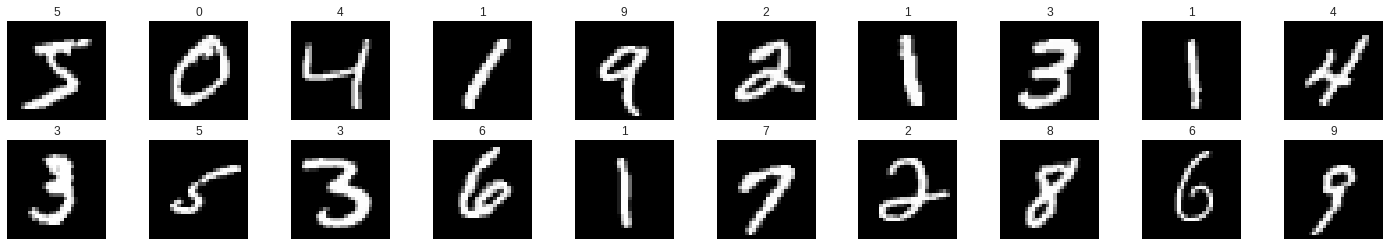

In [1]:
# Load the libraries
import torch
import numpy as np

from torchvision import datasets
import torchvision.transforms as transforms

# Set the parameters
num_workers = 0
batch_size = 20

# Converting the Images to tensors using Transforms
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# Loading the Data
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

import matplotlib.pyplot as plt
%matplotlib inline
    
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# Peeking into dataset
fig = plt.figure(figsize=(25, 4))
for image in np.arange(20):
    ax = fig.add_subplot(2, 20/2, image+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[image]), cmap='gray')
    ax.set_title(str(labels[image].item()))

Feed the image into the NN and view the array data to visual the character

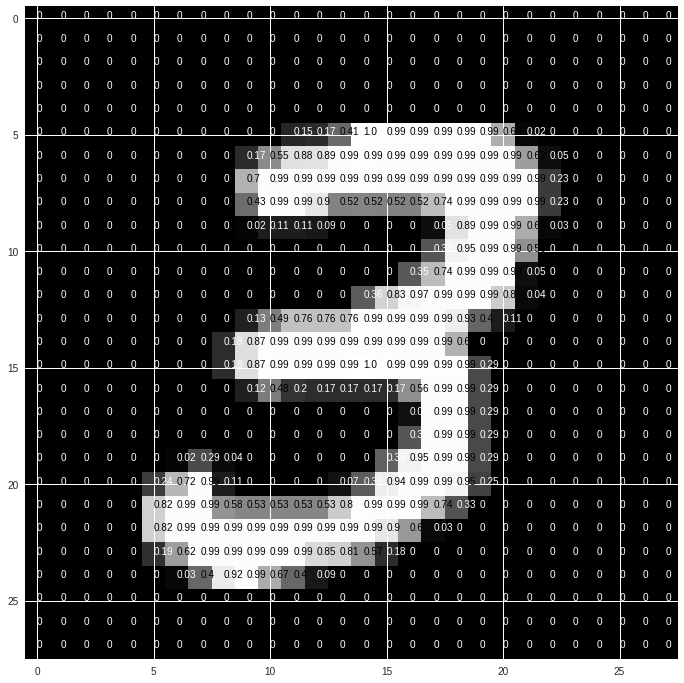

In [2]:
img = np.squeeze(images[7])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
            color='white' if img[x][y]<thresh else 'black')

Check the grayscale version of the MNIST value

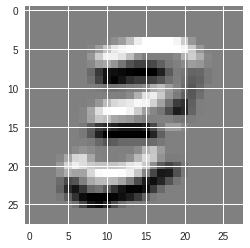

In [3]:
import cv2

sobel = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

img = np.squeeze(images[7])
filtered_image = cv2.filter2D(img, -1, sobel)

plt.imshow(filtered_image, cmap='gray')

See the detailed MNIST value

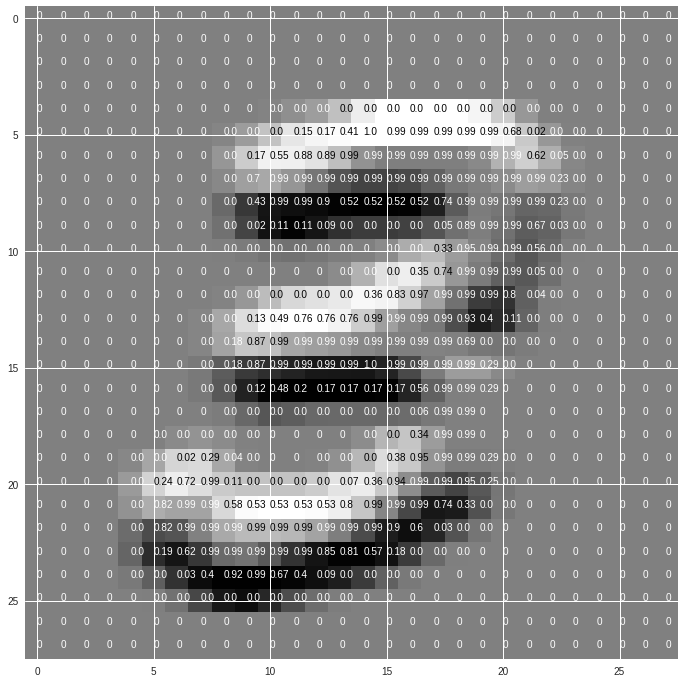

In [4]:
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(filtered_image, cmap='gray')
width, height = filtered_image.shape
thresh = filtered_image.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if filtered_image[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    color='white' if filtered_image[x][y]<thresh else 'black')

Upload the dog image and verify contents

In [0]:
# upload the imge file of the dog
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dog.png to dog.png
User uploaded file "dog.png" with length 90721 bytes


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
image_ar = uploaded["dog.png"]

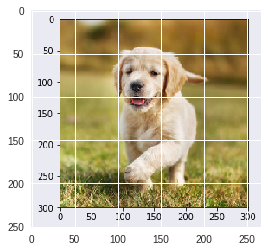

In [6]:
# @title
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

image_ar = mpimg.imread('/content/gdrive/My Drive/Colab Notebooks/dog.png')
plt.imshow(image_ar)

# Image(image_ar)

Change the image to a gray scale applying the filter

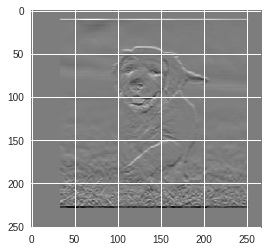

In [7]:
gray = cv2.cvtColor(image_ar, cv2.COLOR_RGB2GRAY)

sobel = np.array([[-1, -2, -1],
                [0, 0, 0],
                [1, 2, 1]])

filtered_image = cv2.filter2D(gray, -1, sobel)

plt.imshow(filtered_image, cmap='gray')

Attempting to build a full CNN with Cross Entreopy Loss function and Softmax probability classification

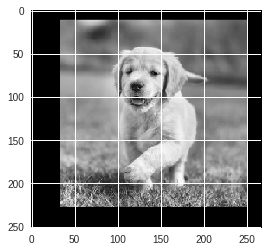

In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_path = '/content/gdrive/My Drive/Colab Notebooks/dog.png'

bgr_img = cv2.imread(img_path)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# Normalise
gray_img = gray_img.astype("float32")/255

plt.imshow(gray_img, cmap='gray')
plt.show()

Looking at the filters applied to grey scale image 

Filter shape:  (4, 4)


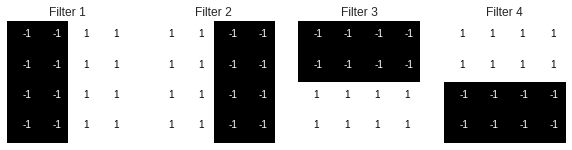

In [9]:
import numpy as np

filter_vals = np.array([
  [-1, -1, 1, 1],
  [-1, -1, 1, 1],
  [-1, -1, 1, 1],
  [-1, -1, 1, 1]
])

print('Filter shape: ', filter_vals.shape)

# Defining the Filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# Check the Filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        color='white' if filters[i][x][y]<0 else 'black')

Build the methods for **max pooling ** down sampling layer and **forward propagation** methods 

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    

class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        # initializes the weights of the convolutional layer
        self.conv.weight = torch.nn.Parameter(weight)
        # define a pooling layer
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # applies pooling layer
        pooled_x = self.pool(activated_x)
        
        # returns all layers
        return conv_x, activated_x, pooled_x
    
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


Visualising the filters used in the CNN

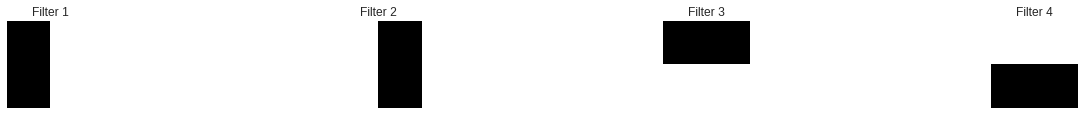

In [11]:

def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

Images outputted in CONV and POOL layers are below

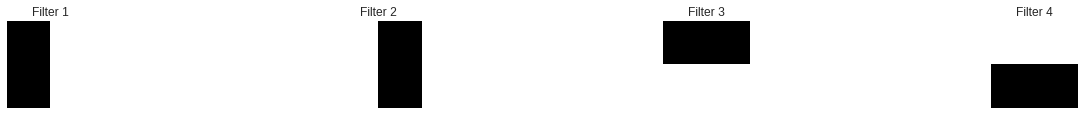

In [15]:

# plt.imshow(gray_img, cmap='gray')

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# viz_layer(gray_img)

In [0]:
# viz_layer(pooled_layer)